In [1]:
#!pip install python-dateutil==2.5.0
#!pip install pandas
from PIL import Image
import glob
import pandas as pd
image_list = []
for filename in glob.glob('./light/*.jpg'):
    image_list.append(filename)

import matplotlib.pyplot as plt

df=pd.DataFrame(columns=['image'])
dfcropped=pd.DataFrame(columns=['image'])

In [2]:


for file_name in image_list:
   
    df=df.append({'image':file_name},ignore_index=True)

In [3]:
df=df.sample(frac=1)


In [4]:
df

,image
6,./light/left0282.jpg
1,./light/left0358.jpg
3,./light/left0701.jpg
0,./light/left0681.jpg
7,./light/left0140.jpg
4,./light/left0183.jpg
2,./light/left0528.jpg
8,./light/left0561.jpg
5,./light/left0000.jpg


In [5]:
import cv2
import numpy as np
import tensorflow as tf
import datetime

In [6]:

        
PATH_TO_FROZEN_GRAPH = './frozen_inference_graph.pb'





detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        ser_graph = fid.read()
        od_graph_def.ParseFromString(ser_graph)
        tf.import_graph_def(od_graph_def, name='')


session = tf.Session(graph=detection_graph)
scores_ = detection_graph.get_tensor_by_name('detection_scores:0')
classes_ = detection_graph.get_tensor_by_name('detection_classes:0')
boxes_ = detection_graph.get_tensor_by_name('detection_boxes:0')
image_tensor_ = detection_graph.get_tensor_by_name('image_tensor:0')
num_detections_ = detection_graph.get_tensor_by_name('num_detections:0')

In [7]:
df

,image
6,./light/left0282.jpg
1,./light/left0358.jpg
3,./light/left0701.jpg
0,./light/left0681.jpg
7,./light/left0140.jpg
4,./light/left0183.jpg
2,./light/left0528.jpg
8,./light/left0561.jpg
5,./light/left0000.jpg


In [8]:
def detect_red_and_yellow(img, Threshold=0.06):
    """
    detect red and yellow
    :param img:
    :param Threshold:
    :return:
    """

    desired_dim = (30, 90)  # width, height
    img = cv2.resize(np.array(img), desired_dim, interpolation=cv2.INTER_LINEAR)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # lower mask (0-10)
    lower_red = np.array([0, 70, 50])
    upper_red = np.array([10, 255, 255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red1 = np.array([170, 70, 50])
    upper_red1 = np.array([180, 255, 255])
    mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)

    # defining the Range of yellow color
    lower_yellow = np.array([21, 39, 64])
    upper_yellow = np.array([40, 255, 255])
    mask2 = cv2.inRange(img_hsv, lower_yellow, upper_yellow)



    # red pixels' mask
    mask = mask0 + mask1 + mask2





    if np.count_nonzero(mask)> 100:
              return True
    else:
              return False

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

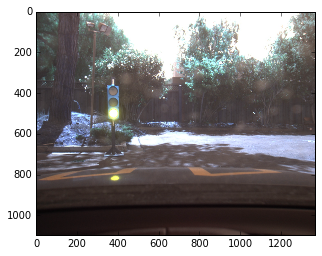

GO


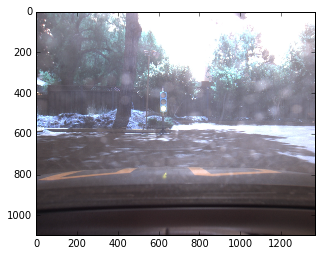

GO


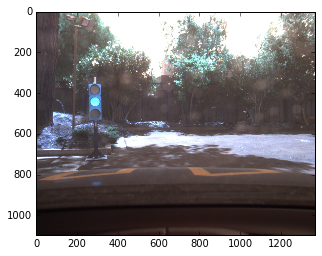

LOW SCORE


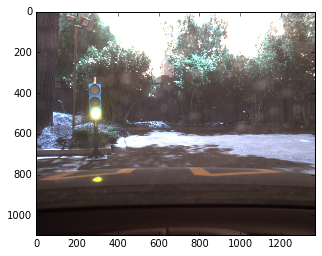

LOW SCORE


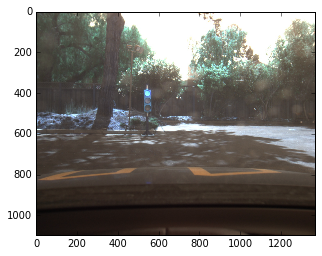

LOW SCORE


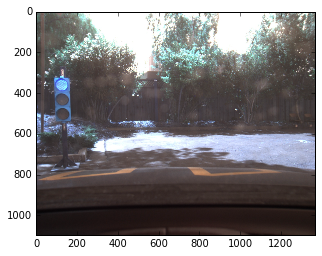

LOW SCORE


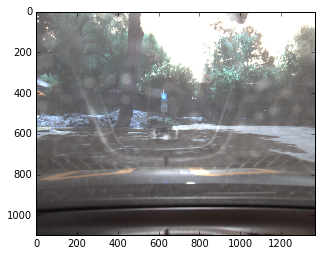

LOW SCORE


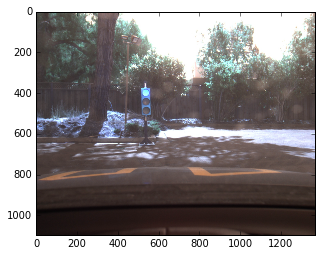

STOP


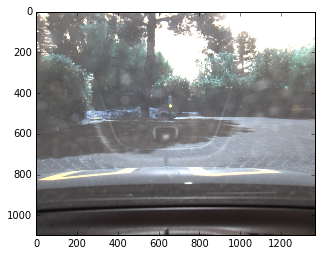

LOW SCORE


In [14]:
import matplotlib.pyplot as plt

for i,r in df.iterrows():
    
    image=cv2.imread(r['image'])
    plt.imshow(image)
    plt.show()
    
    with detection_graph.as_default():
        im_expand = np.expand_dims(image, axis=0)
        class_init_t = datetime.datetime.now()

        (boxes, scores, classes, num_detections) = session.run(
            [boxes_, scores_, classes_, num_detections_],
            feed_dict={image_tensor_: im_expand})

        
        class_end_t = datetime.datetime.now()
        delta_time = class_end_t - class_init_t
   
    boxes = np.squeeze(boxes)
    scores = np.squeeze(scores)
    classes = np.squeeze(classes).astype(np.int32)
    max_score=np.argmax(scores)
    #print(max_score)
    #print(scores)
    #print(classes[0])
    #print(scores[0])
    if scores[0] > 0.8:
        shape = image.shape
        im_width=shape[0]
        im_height=shape[1]
       
        stop_flag = False
        min_score_thresh=0.3
        for i in range(boxes.shape[0]):
            
            if scores[i] > min_score_thresh and classes[i]<20 and classes[i]>=10:
                box = boxes[i].tolist()





                xmin  = box[0]
                ymin  = box[1]
                xmax  = box[2]
                ymax  = box[3]
                (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
                a,b,c,d = int(left) , int(right) , int(top) ,int(bottom)
                crop_img = image[a:b,c:d]
                print(scores[i])
                print(classes[i])
                plt.imshow(crop_img)
                plt.show()
                if detect_red_and_yellow(crop_img):
                            stop_flag = True


        if classes[0]==3 or classes[0]==2:
                    print('STOP')
        else:

                    print('GO')
    else:
        print('LOW SCORE')